In [2]:
# Import all the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_excel("Data/1965-2013/Rainfall.xlsx",sheet_name='all')
data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bang,lade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Daily,tot,al,Rain,fall,da,ta,in,Mill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
8,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
# Delete First 7 Unnecessary rows
data = data.drop(labels=[i for i in range(0,7)], axis=0)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
7,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
8,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
10,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN


In [5]:
#Resetting the index of the data
data = data.reset_index()
data.head(5)

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,7,Station,Year,Mo,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
1,8,Dhaka,1963,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Dhaka,1963,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,10,Dhaka,1963,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,11,Dhaka,1963,4,0,0,1,0,0,2,...,13,0,0,0,0,0,0,0,25,NaN


In [6]:
# Deleting the previous index column
data = data.drop(labels='index',axis=1)
data.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN


In [7]:
# Setting the index of the dataframe to the first row
df = data.rename(columns=data.iloc[0]).drop(labels=0,axis=0)
df.head(5)
#Now the data is in good condition human readable format

,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [8]:
# Renaming Column Mo to Month
df.rename(columns = {'Mo':'Month'}, inplace = True)
df.head(5)

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [9]:
df.shape

(18076, 34)

In [10]:
# Function to show unique items in a column with a certain name to print info
def unique_items(df,column,unique_item_name):
    district = df[column].unique()
    num_of_district = district.size
    print('Total number of '+unique_item_name+': ' + str(num_of_district))
    print(district)

In [11]:
unique_items(df,'Station','District')

Total number of District: 37
['Dhaka' nan 'Station' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu'
 'Srimanga' 'Sylhet' 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur'
 'sydpur' 'chuadang' 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal'
 'Bhola' 'Khepupar' 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla'
 "Cox's Ba" 'Feni' 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip'
 'Ambagan(' 'Sitakund']


### We have some garbage values inside the dataframe which are nan and 'Station' which is not a district.

In [12]:
# Deleting df['Station']='Station' datas from the df
df = df[df.Station != 'Station']

# Deleting nan values of df['Station']
df = df[df.Station.notna()]
unique_items(df,'Station','District')
df.head(5)

Total number of District: 35
['Dhaka' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu' 'Srimanga' 'Sylhet'
 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'sydpur' 'chuadang'
 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola' 'Khepupar'
 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla' "Cox's Ba" 'Feni'
 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip' 'Ambagan(' 'Sitakund']


,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


## The district values are cleaned. Now we go into the years and months sections. We need to check how if the data matches our dataset. Unique years should be 51and Months will be 12

In [13]:
df.shape

(17940, 34)

In [14]:
unique_items(df,'Month','Months')
unique_items(df,'Year','Years')

Total number of Months: 12
[1 2 3 4 5 6 7 8 9 10 11 12]
Total number of Years: 429
[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 'gh   1963' 'gh   1964'
 'gh   1965' 'gh   1966' 'gh   1967' 'gh   1968' 'gh   1969' 'gh   1970'
 'gh   1971' 'gh   1972' 'gh   1973' 'gh   1974' 'gh   1975' 'gh   1976'
 'gh   1977' 'gh   1978' 'gh   1979' 'gh   1980' 'gh   1981' 'gh   1982'
 'gh   1983' 'gh   1984' 'gh   1985' 'gh   1986' 'gh   1987' 'gh   1988'
 'gh   1989' 'gh   1990' 'gh   1991' 'gh   1992' 'gh   1993' 'gh   1994'
 'gh   1995' 'gh   1996' 'gh   1997' 'gh   1998' 'gh   1999' 'gh   2000'
 'gh   2001' 'gh   2002' 'gh   2003' 'gh   2004' 'gh   2005' 'gh   2006'
 'gh   2007' 'gh   2008' 'gh   2009' 'gh   2010' 'gh   2011' 'gh   2012'
 'gh   2013' 1974 'r    1977' 'r    1978' 'r    1980' '

## We have errors on the yearly data. Actually the errors are just the additional parts from the previous column. We need to cut that extra part. 
Only taking the last 4 values of df['Year'] and converting it to integer can solve this problem.

In [15]:
print(df['Year'].size)
# Use of lambda fuctions...The logic is written below
df['Year'] = df['Year'].map(lambda x:int(x[-4:]) if (type(x) == str) else int(x))
print(df['Year'].size)
unique_items(df,'Year','Years')


## Logic ##
# df2 = df.copy()
# for i in df2['Year']:
#     if type(i) == str:
#         i = int(i[-4:])

17940
17940
Total number of Years: 51
[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 1974]


In [16]:
df.shape

(17940, 34)

In [17]:
df2 = df.copy()
unique_items(df2,'Station','District')

Total number of District: 35
['Dhaka' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu' 'Srimanga' 'Sylhet'
 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'sydpur' 'chuadang'
 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola' 'Khepupar'
 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla' "Cox's Ba" 'Feni'
 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip' 'Ambagan(' 'Sitakund']


In [18]:
# Fixing the typo of the names of the districts

df2.loc[df2["Station"] == "Mymensin", "Station"] = "Mymensingh"
df2.loc[df2["Station"] == "Madaripu", "Station"] = "Madaripur"
df2.loc[df2["Station"] == "Srimanga", "Station"] = "Srimangal"
df2.loc[df2["Station"] == "sydpur", "Station"] = "Syedpur"
df2.loc[df2["Station"] == "chuadang", "Station"] = "Chuadanga"
df2.loc[df2["Station"] == "Khepupar", "Station"] = "Khepupara"
df2.loc[df2["Station"] == "Patuakha", "Station"] = "Patuakhali"
df2.loc[df2["Station"] == "Chittago", "Station"] = "Chittagong"
df2.loc[df2["Station"] == "Cox's Ba", "Station"] = "Cox's Bazar"
df2.loc[df2["Station"] == "Rangamat", "Station"] = "Rangamati"
df2.loc[df2["Station"] == "Sitakund", "Station"] = "Sitakunda"
df2.loc[df2["Station"] == "Ambagan(", "Station"] = "Ambagan(Ctg)"

In [19]:
unique_items(df2,'Station','District')

Total number of District: 35
['Dhaka' 'Tangail' 'Mymensingh' 'Faridpur' 'Madaripur' 'Srimangal'
 'Sylhet' 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'Syedpur'
 'Chuadanga' 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola'
 'Khepupara' 'Patuakhali' 'Chandpur' 'Teknaf' 'Chittagong' 'Comilla'
 "Cox's Bazar" 'Feni' 'Hatiya' 'Kutubdia' 'M.court' 'Rangamati' 'Sandwip'
 'Ambagan(Ctg)' 'Sitakunda']


In [20]:
df2.head()

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [21]:
df_predict = df2.melt(id_vars=["Station", "Year","Month"], 
        var_name="Date", 
        value_name="Rainfall_Value")

In [22]:
df_predict = df_predict.dropna()
df_predict = df_predict.sort_values(by=['Year', 'Month','Station'])

In [23]:
df_predict = df_predict.reset_index(drop=True)

In [24]:
df_predict.drop(df_predict.index[df_predict['Rainfall_Value'] == '***'], inplace=True)
unique_items(df_predict,'Rainfall_Value','Unique items')

Total number of Unique items: 343
[0 3 1 2 5 19 254 6 8 27 4 50 39 25 15 33 10 34 13 29 7 16 80 17 40 20 12
 21 11 58 63 9 44 23 31 24 18 22 43 85 47 71 28 14 32 53 36 64 75 38 60 26
 73 51 228 231 61 46 105 82 93 37 35 57 48 42 70 30 62 112 56 97 114 167
 87 84 186 100 159 189 68 79 41 59 88 96 94 107 109 45 132 166 138 49 78
 137 55 83 72 66 91 74 155 173 135 89 92 243 143 111 131 108 99 124 115 86
 69 236 195 133 168 54 110 65 67 103 141 181 241 194 98 104 140 121 172
 125 76 90 106 52 162 177 77 102 127 118 170 95 216 101 153 229 136 176
 119 214 126 81 122 178 161 180 128 123 198 221 227 226 281 165 203 154
 164 208 113 217 268 160 144 193 146 182 212 130 139 157 129 117 145 156
 319 174 257 184 209 116 190 191 258 150 134 158 147 151 336 298 192 246
 244 213 120 163 152 169 197 339 210 274 149 196 239 211 215 218 220 142
 205 199 204 251 171 148 508 249 381 320 564 185 179 224 292 187 269 235
 232 399 219 201 175 233 265 230 305 238 225 183 335 351 200 514 272 330
 247 206 290 27

In [25]:
df_predict = df_predict.copy()
df_predict.head()

,Station,Year,Month,Date,Rainfall_Value
0,Barisal,1963,1,1,0
1,Barisal,1963,1,2,0
2,Barisal,1963,1,3,0
3,Barisal,1963,1,4,0
4,Barisal,1963,1,5,0


In [26]:
# Working with the dataframe
df2 = df2.fillna(0)

# Deleting the '***' values
df2 = df2[df2!="***"]

In [27]:
# Monthly Rain Data Extracted

df2["Rainfall"] = df2.iloc[:,3:34].sum(axis=1)
df2.head()

# Dropping day columns
df2.drop(df2.iloc[:, 3:34], inplace = True, axis = 1)

In [28]:
# Replace Month number as names
month = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December',
}

# Converting month number into names

for i in range(1,13):
    df2['Month'] = df2['Month'].replace([i],month[i])

In [29]:
df_visual = df2.pivot_table('Rainfall', ['Station', 'Year'], 'Month')

In [30]:
df_visual.reset_index( drop=False, inplace=True )
df_visual = df_visual.reindex(['Station','Year']+[month[i] for i in range(1,13)], axis=1)
df_visual["Annual Rain"] = df_visual.iloc[:,2:14].sum(axis=1)

In [31]:
# Rename Month Axis
df_visual = df_visual.rename_axis(None, axis=1)

In [32]:
# Now dividing the months into 4 parts according to Monthly rains
df_f = df_visual.copy()

In [33]:
df_f['Jan-Feb'] = df_f.iloc[:,2:4].sum(axis=1)
df_f['Mar-May'] = df_f.iloc[:,4:7].sum(axis=1)
df_f['Jun-Sep'] = df_f.iloc[:,7:11].sum(axis=1)
df_f['Oct-Dec'] = df_f.iloc[:,11:14].sum(axis=1)

In [34]:
df_f

,Station,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual Rain,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,Ambagan(Ctg),1999,0.0,0.0,1.0,0.0,403.0,896.0,609.0,834.0,244.0,198.0,11.0,81.0,3277.0,0.0,404.0,2583.0,290.0
1,Ambagan(Ctg),2000,34.0,10.0,46.0,119.0,464.0,622.0,708.0,564.0,165.0,488.0,15.0,0.0,3235.0,44.0,629.0,2059.0,503.0
2,Ambagan(Ctg),2001,0.0,7.0,8.0,40.0,461.0,601.0,385.0,237.0,226.0,242.0,81.0,0.0,2288.0,7.0,509.0,1449.0,323.0
3,Ambagan(Ctg),2002,1.0,0.0,70.0,79.0,453.0,374.0,920.0,456.0,145.0,128.0,128.0,10.0,2764.0,1.0,602.0,1895.0,266.0
4,Ambagan(Ctg),2003,0.0,0.0,53.0,170.0,198.0,1209.0,296.0,260.0,210.0,234.0,0.0,66.0,2696.0,0.0,421.0,1975.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,Teknaf,2009,0.0,0.0,0.0,95.0,313.0,542.0,1454.0,851.0,555.0,174.0,3.0,0.0,3987.0,0.0,408.0,3402.0,177.0
1491,Teknaf,2010,0.0,0.0,33.0,8.0,492.0,1089.0,881.0,551.0,400.0,602.0,15.0,193.0,4264.0,0.0,533.0,2921.0,810.0
1492,Teknaf,2011,9.0,1.0,11.0,130.0,312.0,1180.0,848.0,1163.0,826.0,474.0,0.0,0.0,4954.0,10.0,453.0,4017.0,474.0
1493,Teknaf,2012,0.0,0.0,22.0,142.0,154.0,1431.0,1349.0,933.0,496.0,319.0,23.0,0.0,4869.0,0.0,318.0,4209.0,342.0


Station
Teknaf         4083.054054
Sylhet         4043.020000
Cox's Bazar    3649.901961
Name: Annual Rain, dtype: float64
Station
Chuadanga    1481.88000
Rajshahi     1472.56250
Ishurdi      1449.72549
Name: Annual Rain, dtype: float64


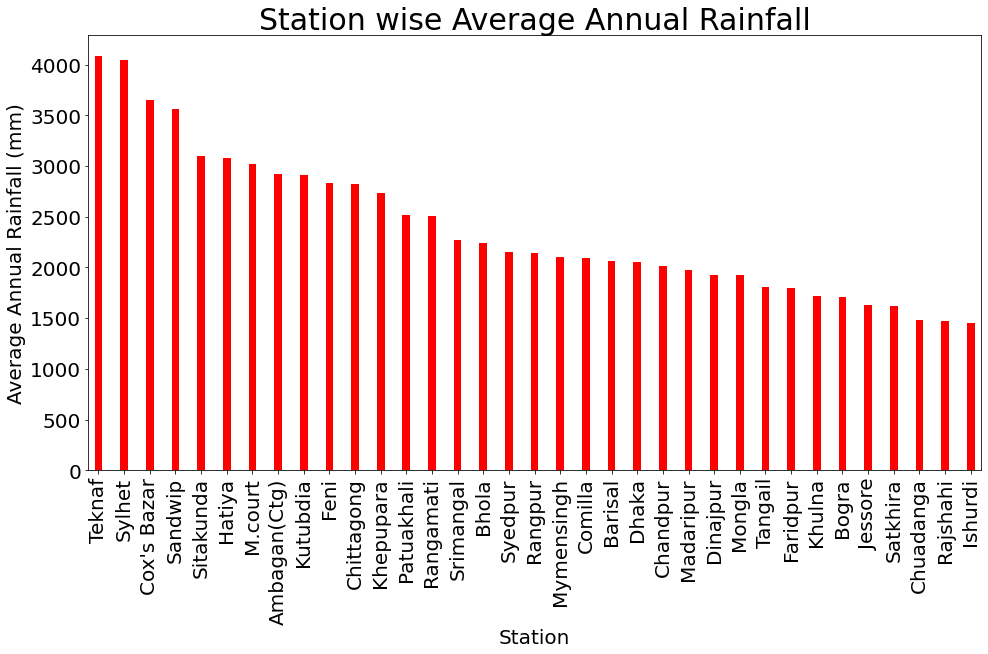

In [35]:
# Data Visualization starts here :

# Average Annual Rainfall

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df_f.groupby('Station').mean().sort_values(by='Annual Rain', ascending=False)['Annual Rain'].plot(kind='bar', color='r',width=0.3,title='Station wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df_f.groupby('Station').mean().sort_values(by='Annual Rain', ascending=False)['Annual Rain'][[0,1,2]])
print(df_f.groupby('Station').mean().sort_values(by='Annual Rain', ascending=False)['Annual Rain'][[32,33,34]])

<iframe src="https://www.kaggle.com/embed/nasirmeh/prediction-of-rainfall?cellIds=8&kernelSessionId=1382268" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Prediction of Rainfall"></iframe>

<iframe src="https://www.kaggle.com/embed/nasirmeh/prediction-of-rainfall?cellIds=8&kernelSessionId=1382268" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Prediction of Rainfall"></iframe>

Stations with highest annual rainfall are "Teknaf", "Sylhet" and "Cox's Bazar" with approximate annual rainfall of 4083mm, 4043mm and 3649mm respectively.

Stations with lowest annual rainfall are "Chuadanga", "Rajshahi" and "Ishurdi" with approximate annual rainfall of 1481mm, 1472mm and 1449mm respectively.

Max: 94075.0 ocurred in [1991]
Min: 32020.0 ocurred in [1972]
Mean: 69594.88235294117


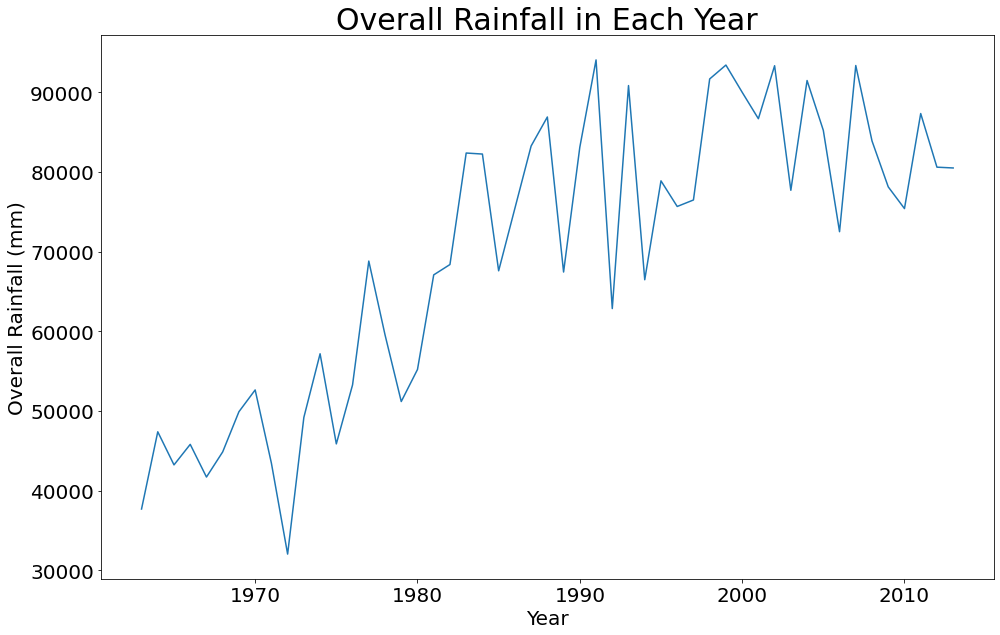

In [36]:
# Total Rainfall in Each Year

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_f.groupby('Year').sum()['Annual Rain']
dfg.plot(kind = 'line', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Min: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 519.6789025105724 ocurred in ['July']
Min: 7.368279578323141 ocurred in ['January']
Mean: 198.62401525932535


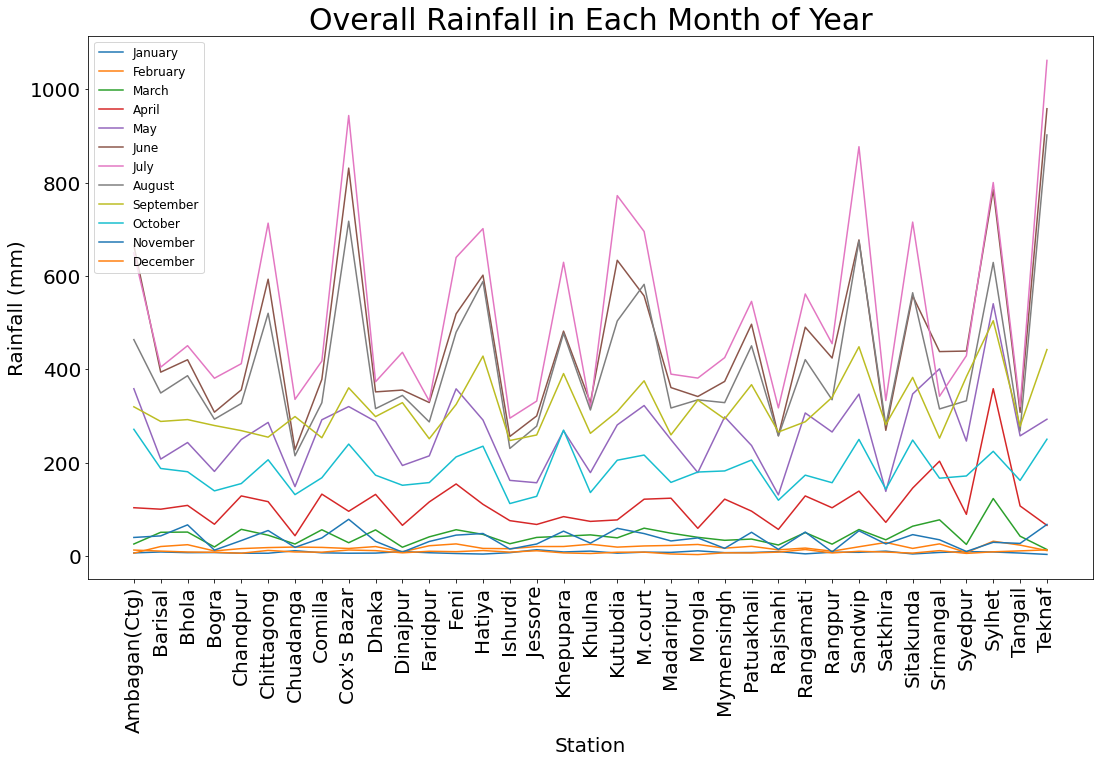

In [37]:
# Monthly Rain

months = df_f.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df_f['Station'].unique()
xlbls.sort()
dfg = df_f.groupby('Station').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,34,35,endpoint=True),xlbls)
plt.xticks(rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper left', fontsize = 'large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Min: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

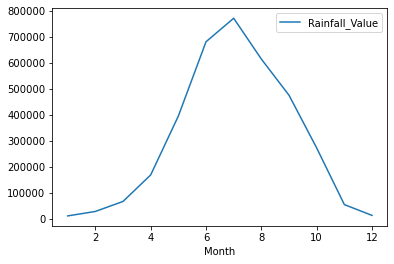

In [38]:
# Rainfall graph per Month 
df_predict.drop(columns=["Year",'Date']).groupby("Month").sum().plot()
plt.show()

In [45]:
# Prediction without stations

X_cols = [
    'Year',
    'Month',
    'Date'
]
y_col = ['Rainfall_Value']
X = df_predict[X_cols]
y = df_predict[y_col]


rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_error(y, y_pred)

C:\Users\dstus\AppData\Local\Temp\ipykernel_13428\1986246135.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


7.892488130479026

In [42]:
rf.predict([[2022,7,7]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([9.60284393])

In [44]:
rf.score(X, y)

0.16502261037484312

In [41]:
add_station_dummies = pd.get_dummies(df_predict['Station'], drop_first=True)

In [42]:
add_station_dummies

,Barisal,Bhola,Bogra,Chandpur,Chittagong,Chuadanga,Comilla,Cox's Bazar,Dhaka,Dinajpur,...,Rangamati,Rangpur,Sandwip,Satkhira,Sitakunda,Srimangal,Syedpur,Sylhet,Tangail,Teknaf
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
546049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
546050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
546051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df_predict = pd.concat([df_predict.drop('Station', axis=1), add_station_dummies], axis=1)

In [47]:
y_col = ['Rainfall_Value']


y = df_predict[y_col]
X = df_predict.drop('Rainfall_Value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train_Test_Split

# poly = PolynomialFeatures(3)
# X = poly.fit_transform(X)


rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(rf.score(X_test, y_test))

8.051733354925336
0.1461147554945833


In [46]:
rf.score(X_train, y_train)

NameError: name 'X_train' is not defined